# Formatting plots

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In Matplotlib, adding a legend is a two-step process:

1) Add a label to each data series by using the label parameter inside the plot() method.
2) Use the legend() method to place the legend on the plot.

In [7]:
x = np.arange(11)
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

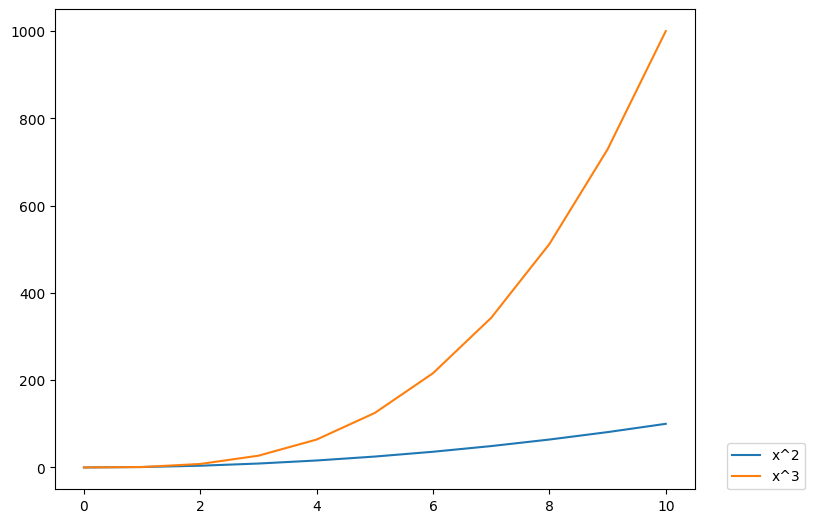

In [12]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x,x**2,label='x^2')
axes.plot(x,x**3,label='x^3')

axes.legend(loc=0)
# axes.legend(loc=(1.05,0.0))

Parametr loc może przyjmować szereg różnego rodzaju wartości. W przykładzie powyżej loc=0 sprawi, że Matplotlib sam postara się znaleźć najlepsze miejsce do umieszczenia legendy na wykresie. Alternatywnie moglibyśmy użyć komendy loc=’best’ i efekt byłby dokładnie ten sam. Matplotlib posiada 11 standardowych pozycji, w których umieści legendę po wprowadzeniu odpowiedniej wartości tekstowej lub liczbowej. Poniżej zestawienie wszystkich standardowych możliwości:

Location String	Location Code
'best'	0
'upper right'	1
'upper left'	2
'lower left'	3
'lower right'	4
'right'	5
'center left'	6
'center right'	7
'lower center'	8
'upper center'	9
'center'	10
Parametr loc, jako wartość, przyjmuje również niestandardowe koordynaty pozycji legendy względem osi X oraz Y w postaci krotki.

## Line Styles and Markers
You can further customize lines and markers to differentiate between data series:

- linewidth controls the thickness of a line.
- alpha controls transparency.
- linestyle sets the line type (e.g., dashed). 
- marker represents each data point visually on the plot.

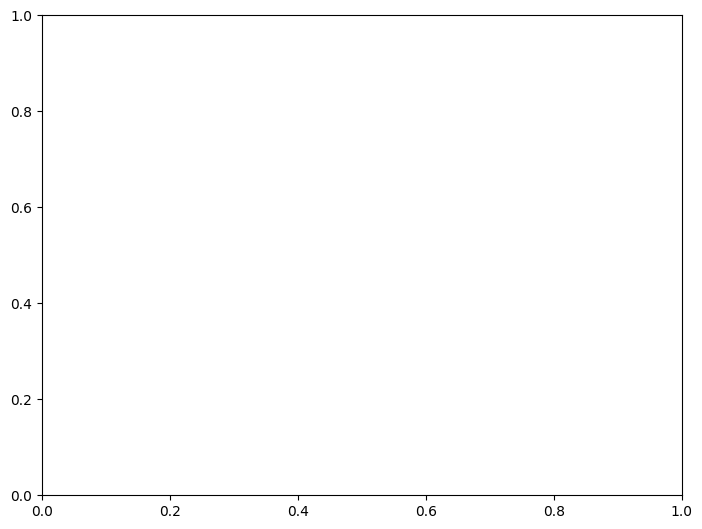

In [24]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

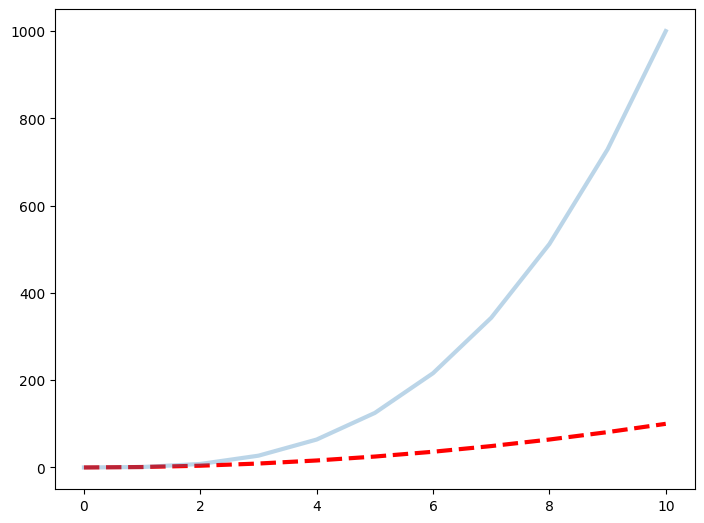

In [16]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x,x**2,label='x^2',color='red',linewidth=3,linestyle='--')
axes.plot(x,x**3,label='x^3',linewidth=3,alpha=0.3)

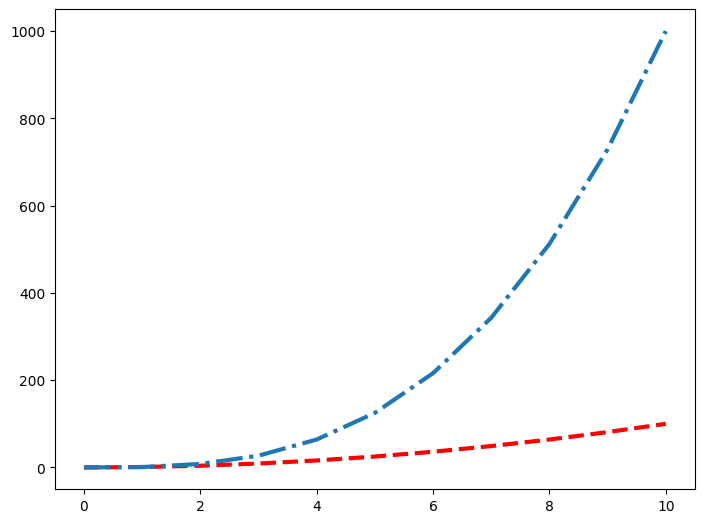

In [18]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x,x**2,label='x^2',color='red',linewidth=3,linestyle='--')
axes.plot(x,x**3,label='x^3',linewidth=3,linestyle='-.')

## Customizing Axes and Ticks

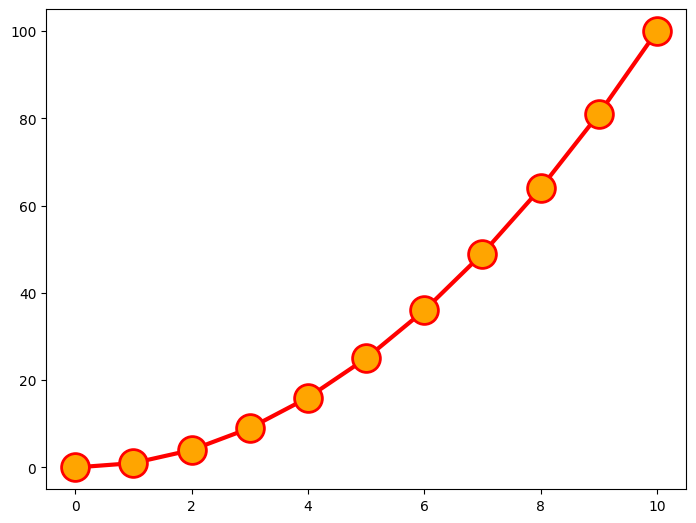

In [19]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(
    x,x**2,label='x^2',
    color='red',
    linewidth=3,
    marker='o',
    markersize=20,
    markerfacecolor='orange',
    markeredgewidth=2
    )

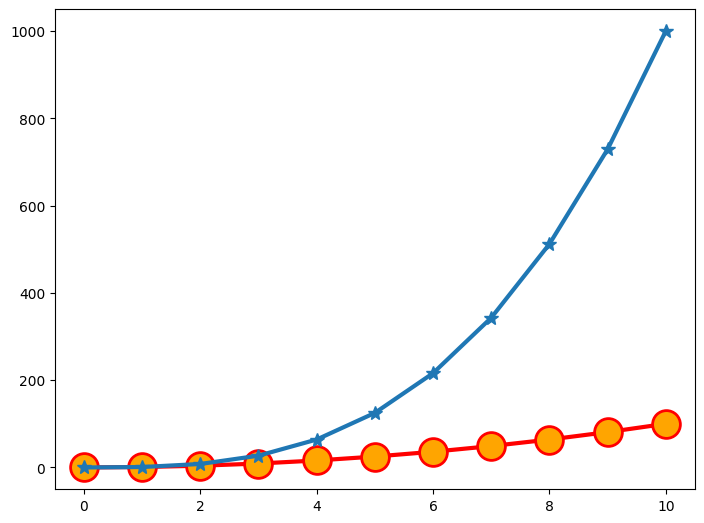

In [22]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(
    x,x**2,label='x^2',
    color='red',
    linewidth=3,
    marker='o',
    markersize=20,
    markerfacecolor='orange',
    markeredgewidth=2
)
axes.plot(
    x,x**3,label='x^3',
    linewidth=3,
    marker='*',
    markersize=10
)

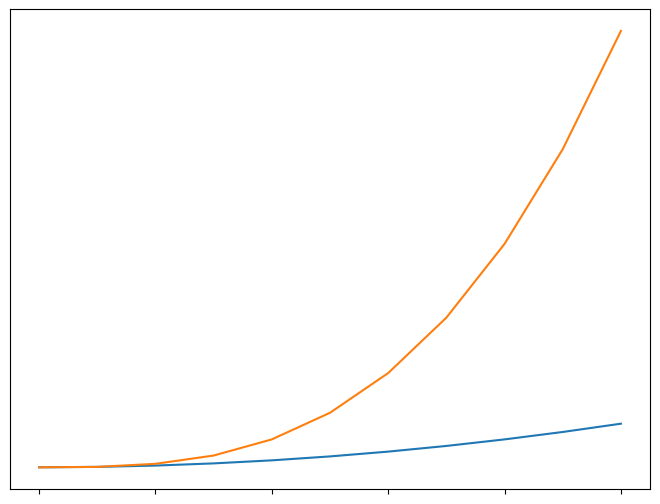

In [27]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.yaxis.set_major_locator(plt.NullLocator())
axes.xaxis.set_major_formatter(plt.NullFormatter())

axes.plot(x,x**2,label='x^2')
axes.plot(x,x**3,label='x^3')

<BarContainer object of 10 artists>

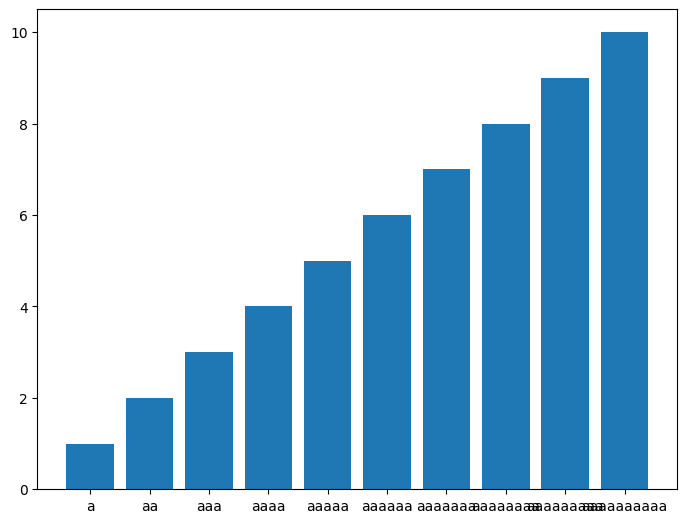

In [29]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(np.array(['a'*n for n in range(1,11)]),np.arange(1,11))

W tym momencie etykiety znaczników osi X nachodzą na siebie, na czym cierpi czytelność samego wykresu. Możemy to zmienić, korzystając z MaxNLocator. Wystarczy, że uzupełnimy wykres o jedną linię kodu:

In [30]:
axes.xaxis.set_major_locator(plt.MaxNLocator(7))

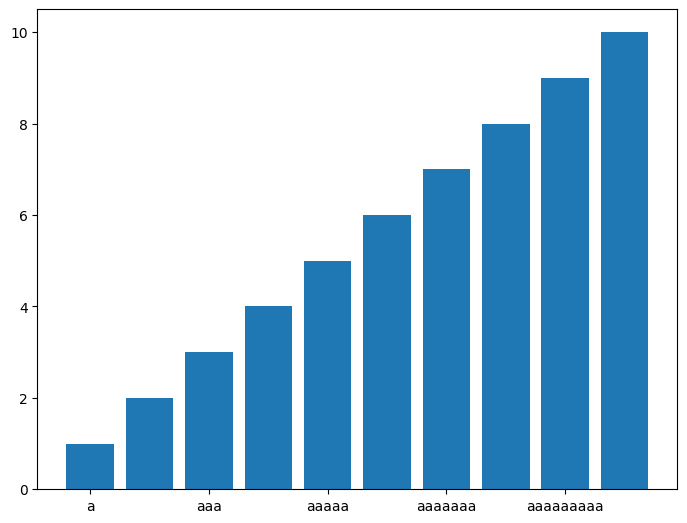

In [38]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(np.array(['a'*n for n in range(1,11)]),np.arange(1,11))
axes.xaxis.set_major_locator(plt.MaxNLocator(7))

### Formatowanie samych etykiet znaczników osi

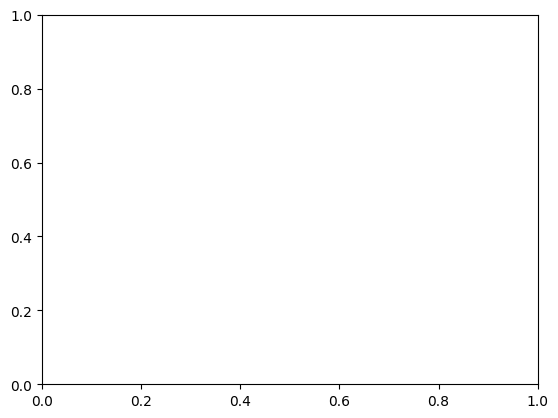

In [39]:
fig, ax = plt.subplots()

In [41]:
years = np.array(['2017','2018','2019','2020F'])
years

array(['2017', '2018', '2019', '2020F'], dtype='<U5')

In [42]:
revenues = [1.5e5, 2.5e6, 5.5e6, 2.0e7]
revenues

[150000.0, 2500000.0, 5500000.0, 20000000.0]

<BarContainer object of 4 artists>

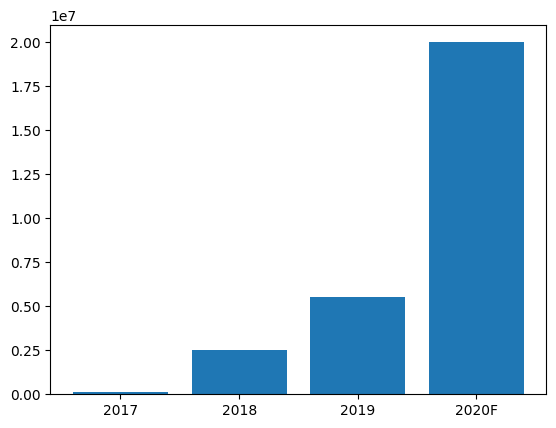

In [43]:
fig, ax = plt.subplots()
years = np.array(['2017','2018','2019','2020F'])
revenues = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

ax.bar(years,revenues)

Funkcja, którą musimy skonstruować, będzie jako argument brała każdą wartość etykiety osi Y i na tej podstawie zwróci sformatowany według naszego uznania string.

In [45]:
def million(x, pos):
    return 'PLN {:2.1f}M'.format(x*1e-6)

<BarContainer object of 4 artists>

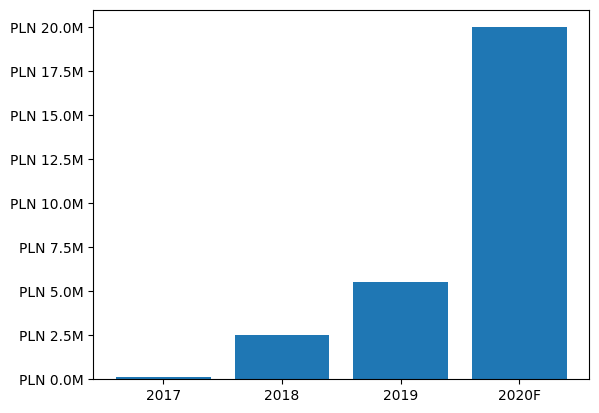

In [46]:
fig, ax = plt.subplots()

years = np.array(['2017','2018','2019','2020F'])
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

formatter = plt.FuncFormatter(million)

ax.yaxis.set_major_formatter(formatter)
ax.bar(years,money)

Dzięki funkcji MultipleLocator możemy ustalić odstępy, na podstawie których będą wyświetlać się kolejne etykiety.

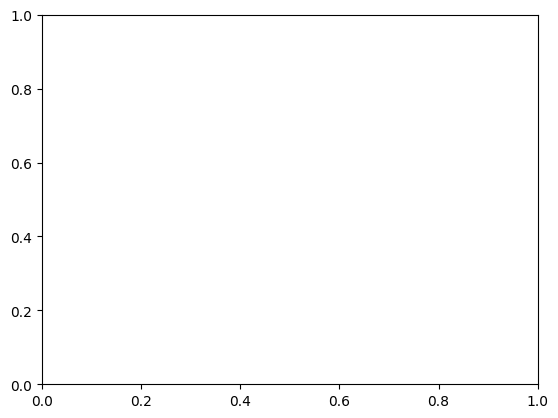

In [47]:
fix, ax = plt.subplots()

<BarContainer object of 4 artists>

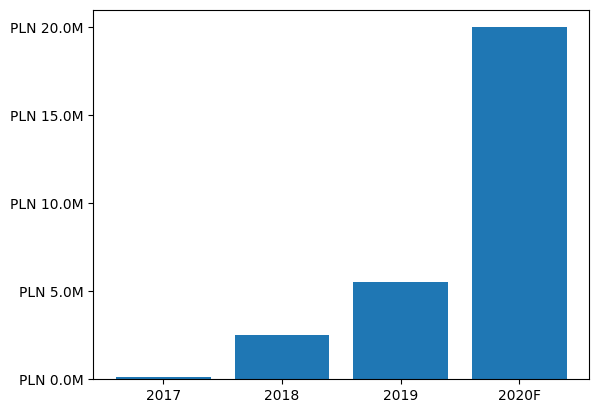

In [48]:
fix, ax = plt.subplots()

years = np.array(['2017','2018','2019','2020F'])
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

formatter = plt.FuncFormatter(million)

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(plt.MultipleLocator(5e6))

ax.bar(years, money)

W jaki sposób można teraz zawęzić wykres według osi Y, tak aby lepiej przyjrzeć się trzem pierwszym słupkom? W tym celu wykorzystamy funkcję set_ylim.

<BarContainer object of 4 artists>

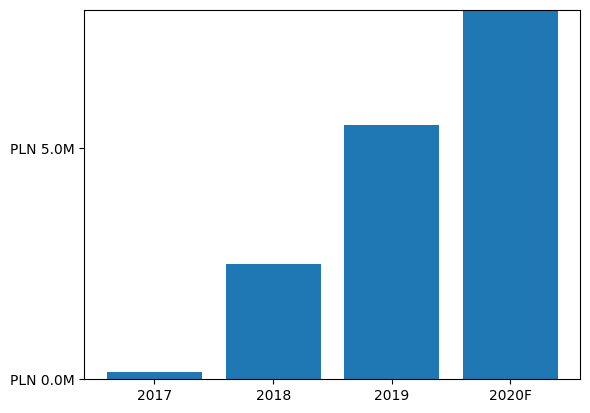

In [49]:
fig, ax = plt.subplots()

years = np.array(['2017','2018','2019','2020F'])
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

formatter = plt.FuncFormatter(million)

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(plt.MultipleLocator(5e6))

ax.set_ylim(0,8e6)

ax.bar(years, money)